**Installing Dependecies**

In [ ]:
# Install the library
%pip install pythae

**Using gpu if available**

In [ ]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"

# %load_ext autoreload
# %autoreload 2

**Loading dataset, selecting specified split of dataset classes(i.e. no. of images from each class to keep) and defining split between train and eval data after random shuffling**

In [ ]:
import numpy as np

cifar10_trainset = datasets.CIFAR10(root='../../data', train=True, download=True, transform=None)

data = np.array(cifar10_trainset.data)
labels = np.array(cifar10_trainset.targets)
selected_classes = ['cat', 'dog', 'horse', 'deer', 'bird']
selected_class_indices = [cifar10_trainset.class_to_idx[c] for c in selected_classes]
class_counts = {
    'cat': 3500,
    'dog': 3500,
    'horse': 1000,
    'deer': 1000,
    'bird': 1000
}

selected_data = []
selected_labels = []

for cls_name in selected_classes:
    cls_idx = cifar10_trainset.class_to_idx[cls_name]
    cls_mask = labels == cls_idx
    cls_data = data[cls_mask]

    chosen_indices = np.random.choice(len(cls_data), class_counts[cls_name], replace=False)
    selected_data.append(cls_data[chosen_indices])
    selected_labels.append(np.full(class_counts[cls_name], cls_idx))

imbalanced_data = np.concatenate(selected_data)
imbalanced_labels = np.concatenate(selected_labels)

perm = np.random.permutation(len(imbalanced_data))
imbalanced_data = imbalanced_data[perm]
imbalanced_labels = imbalanced_labels[perm]

split_idx = int(0.8 * len(imbalanced_data))
train_dataset = imbalanced_data[:split_idx].transpose(0, 3, 1, 2) / 255.0
eval_dataset  = imbalanced_data[split_idx:].transpose(0, 3, 1, 2) / 255.0

print("Train set size:", len(train_dataset))
print("Eval set size:", len(eval_dataset))

from collections import Counter
print("\nFinal training distribution:")
print(Counter(imbalanced_labels[:split_idx]))
print("Final eval distribution:")
print(Counter(imbalanced_labels[split_idx:]))


100%|██████████| 170M/170M [00:07<00:00, 22.4MB/s]


Train set size: 8000
Eval set size: 2000

Final training distribution:
Counter({np.int64(3): 2793, np.int64(5): 2784, np.int64(7): 814, np.int64(2): 808, np.int64(4): 801})
Final eval distribution:
Counter({np.int64(5): 716, np.int64(3): 707, np.int64(4): 199, np.int64(2): 192, np.int64(7): 186})


In [ ]:
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.cifar import Encoder_ResNet_VAE_CIFAR, Decoder_ResNet_AE_CIFAR

**Model Configuration**

In [ ]:
config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_epochs=50,
    optimizer_cls="AdamW",
    optimizer_params={"weight_decay": 0.05, "betas": (0.91, 0.99)}
)


model_config = VAEConfig(
    input_dim=(3, 32, 32),
    latent_dim=16
)

model = VAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VAE_CIFAR(model_config),
    decoder=Decoder_ResNet_AE_CIFAR(model_config)
)

In [ ]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

This code block trains the VAE using the train and eval datasets

In [ ]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
INFO:pythae.pipelines.training:Preprocessing train data...
Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Preprocessing eval data...

INFO:pythae.pipelines.training:Preprocessing eval data...

Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created my_model folder since did not exist.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model folder since did not exist.

Created my_model/VAE_training_2025-11-10_16-11-44. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model/VAE_training_2025-11-10_16-11-44. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_

Training of epoch 1/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 1/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 85.166
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 85.166
Eval loss: 64.3596
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 64.3596
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 2/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 59.2553
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 59.2553
Eval loss: 56.2395
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 56.2395
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 3/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 54.6252
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 54.6252
Eval loss: 53.2339
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 53.2339
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 4/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 52.5102
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 52.5102
Eval loss: 51.5714
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 51.5714
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 5/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 51.2439
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 51.2439
Eval loss: 51.0594
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 51.0594
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 6/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 50.1196
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 50.1196
Eval loss: 49.7805
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 49.7805
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 7/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 49.4483
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 49.4483
Eval loss: 48.9201
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 48.9201
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 8/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 48.9388
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 48.9388
Eval loss: 48.8776
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 48.8776
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 9/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 48.7207
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 48.7207
Eval loss: 48.6859
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 48.6859
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 10/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 48.5102
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 48.5102
Eval loss: 48.5056
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 48.5056
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 11/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 48.2311
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 48.2311
Eval loss: 48.13
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 48.13
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 12/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 48.2344
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 48.2344
Eval loss: 47.9794
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.9794
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 13/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.9888
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.9888
Eval loss: 47.8368
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.8368
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 14/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.8414
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.8414
Eval loss: 47.8283
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.8283
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 15/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.8389
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.8389
Eval loss: 47.7563
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.7563
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 16/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.6269
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.6269
Eval loss: 47.7233
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.7233
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 17/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.6181
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.6181
Eval loss: 47.695
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.695
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 18/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.4884
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.4884
Eval loss: 47.4595
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.4595
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 19/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.4046
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.4046
Eval loss: 47.5636
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.5636
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 20/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.3473
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.3473
Eval loss: 47.384
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.384
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 21/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 21/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.2601
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.2601
Eval loss: 47.4085
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.4085
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 22/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 22/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.2403
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.2403
Eval loss: 47.312
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.312
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 23/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 23/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.204
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.204
Eval loss: 47.4989
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.4989
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 24/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 24/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.1194
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.1194
Eval loss: 47.4503
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.4503
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 25/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 25/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.1085
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.1085
Eval loss: 47.4979
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.4979
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 26/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 26/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.1088
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.1088
Eval loss: 47.1699
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.1699
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 27/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 27/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.9694
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.9694
Eval loss: 47.1448
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.1448
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 28/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 28/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.9991
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.9991
Eval loss: 47.0538
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.0538
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 29/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 29/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.8749
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.8749
Eval loss: 47.2957
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.2957
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 30/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 30/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.8857
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.8857
Eval loss: 46.8406
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.8406
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 31/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 31/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.7873
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.7873
Eval loss: 46.879
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.879
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 32/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 32/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.8234
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.8234
Eval loss: 46.9661
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.9661
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 33/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 33/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.8474
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.8474
Eval loss: 46.9017
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.9017
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 34/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 34/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.7829
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.7829
Eval loss: 46.8305
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.8305
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 35/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 35/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.7013
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.7013
Eval loss: 46.9253
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.9253
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 36/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 36/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.6627
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.6627
Eval loss: 46.7039
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.7039
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 37/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 37/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.6604
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.6604
Eval loss: 47.0277
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.0277
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 38/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 38/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.6259
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.6259
Eval loss: 46.7643
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.7643
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 39/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 39/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.6297
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.6297
Eval loss: 47.0691
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.0691
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 40/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 40/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.5726
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.5726
Eval loss: 46.9681
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.9681
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 41/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 41/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.5324
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.5324
Eval loss: 46.7691
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.7691
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 42/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 42/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.4609
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.4609
Eval loss: 47.1275
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.1275
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 43/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 43/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.5186
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.5186
Eval loss: 46.8567
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.8567
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 44/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 44/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.5399
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.5399
Eval loss: 46.8244
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.8244
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 45/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 45/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.4522
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.4522
Eval loss: 46.9551
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.9551
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 46/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 46/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.4548
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.4548
Eval loss: 46.794
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.794
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 47/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 47/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.4844
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.4844
Eval loss: 46.4869
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.4869
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 48/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 48/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.3651
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.3651
Eval loss: 46.7862
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.7862
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 49/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 49/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.3312
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.3312
Eval loss: 46.7822
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.7822
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 50/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 50/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.3484
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.3484
Eval loss: 46.6508
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.6508
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in my_model/VAE_training_2025-11-10_16-11-44/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in my_model/VAE_training_2025-11-10_16-11-44/final_model


In [ ]:
import os
from pythae.models import AutoModel

**Loading the trained model**

In [ ]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [ ]:
from pythae.samplers import NormalSampler

# Sampling from a standard normal or Gaussian Mixture for generating artifical images

**Sampling using normal sampler**

In [ ]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [ ]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [ ]:
import matplotlib.pyplot as plt

**Normal Sampling generation results**

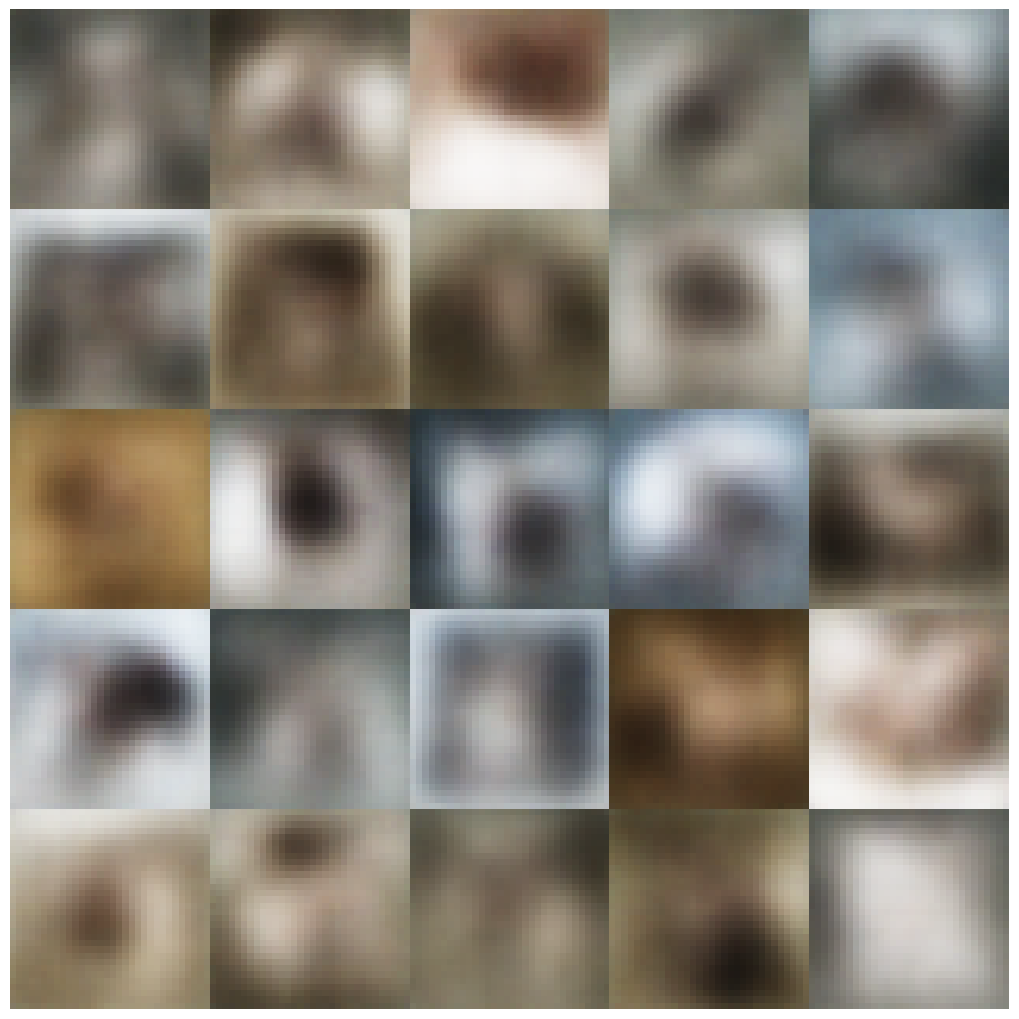

In [ ]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        # Transpose the dimensions to (height, width, channels)
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0).permute(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [ ]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig

**GMM sampling generation results**

In [ ]:
# set up GMM sampler config
gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

# create gmm sampler
gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

# fit the sampler
gmm_sampler.fit(train_dataset)

In [ ]:
# sample
gen_data = gmm_sampler.sample(
    num_samples=25
)

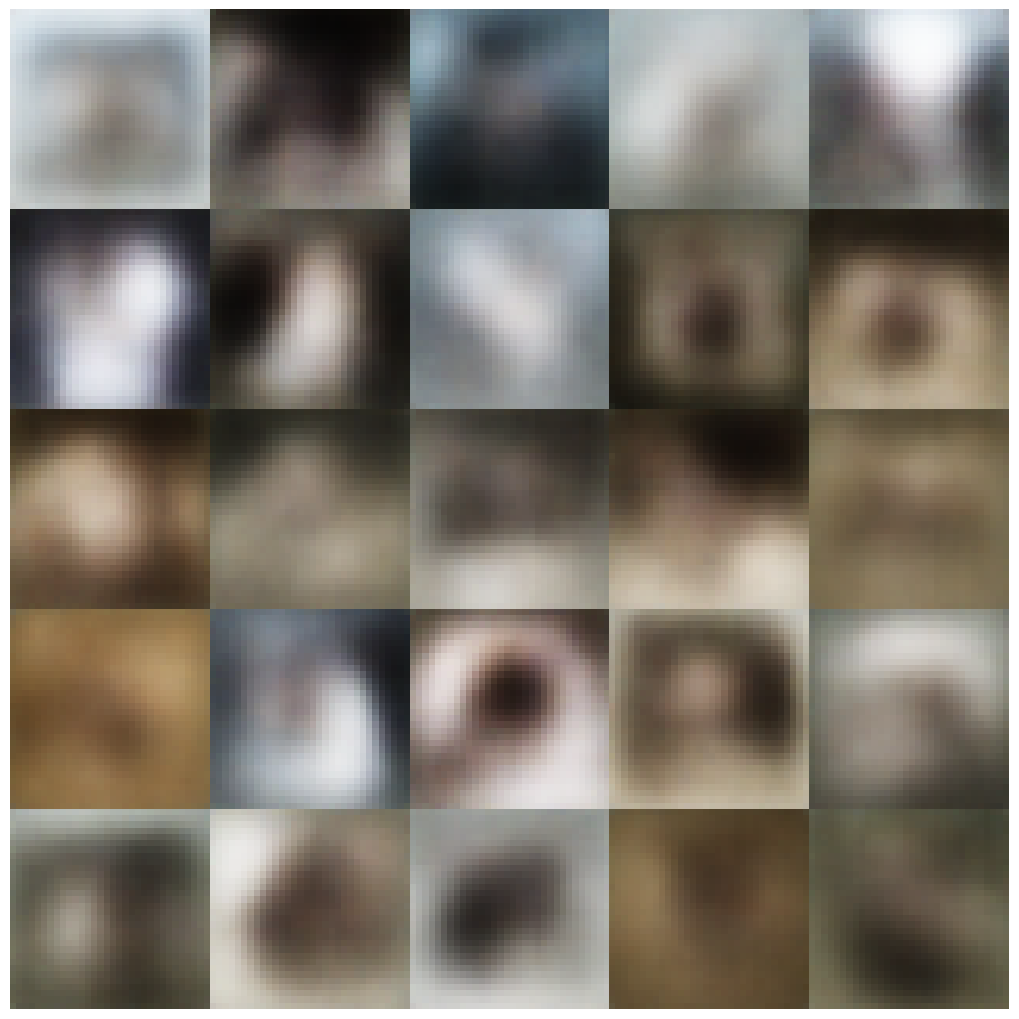

In [ ]:
# show results with gmm sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0).permute(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

## ... the other samplers work the same

## Visualizing reconstructions

Here we are selecting data from the eval data and then passing it to the trained VAE architecture. After that, we compare the reconstruted data from the original data to see the quality of the reconstructed images

In [ ]:
reconstructions = trained_model.reconstruct(torch.from_numpy(eval_dataset[:25]).to(device).float()).detach().cpu()

**Original eval data points/images**

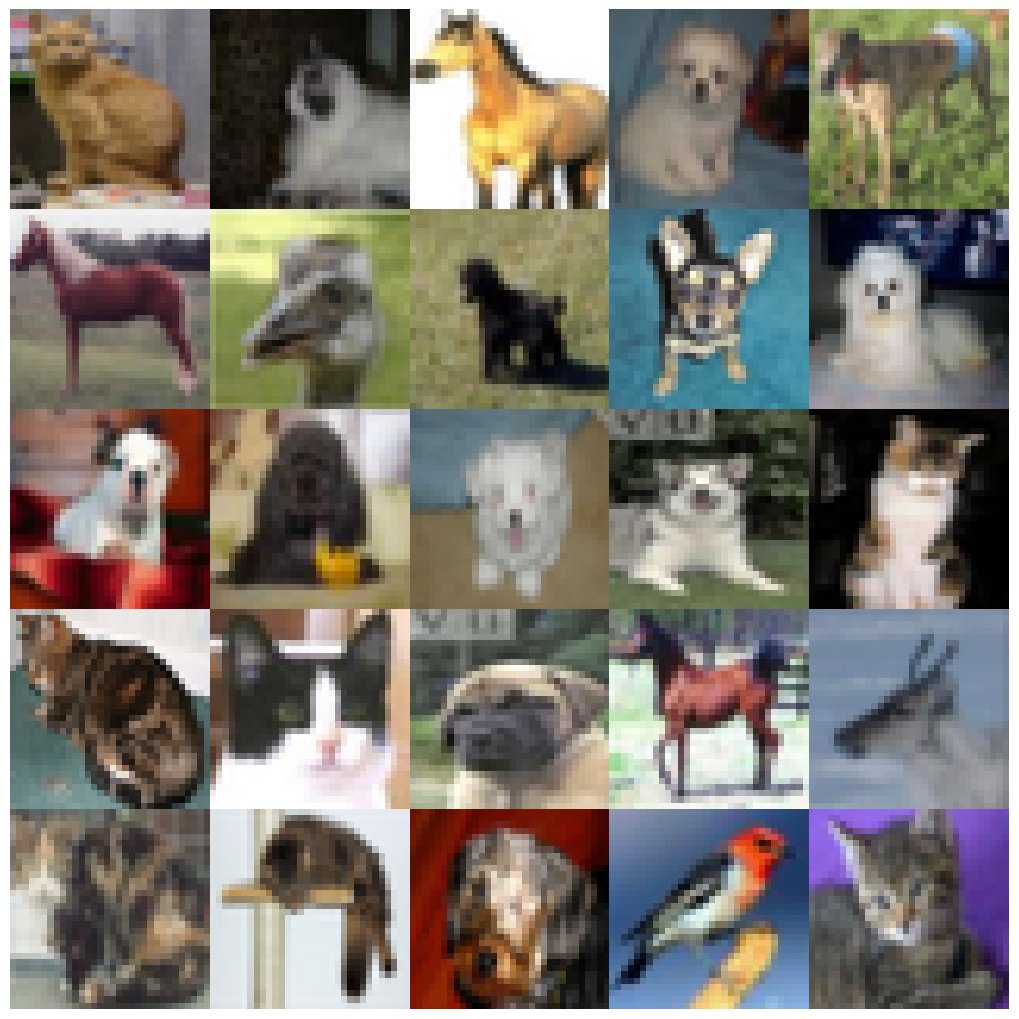

In [ ]:
# show original
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval_dataset[:25][i*5 + j].transpose(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

**Reconstructed images**

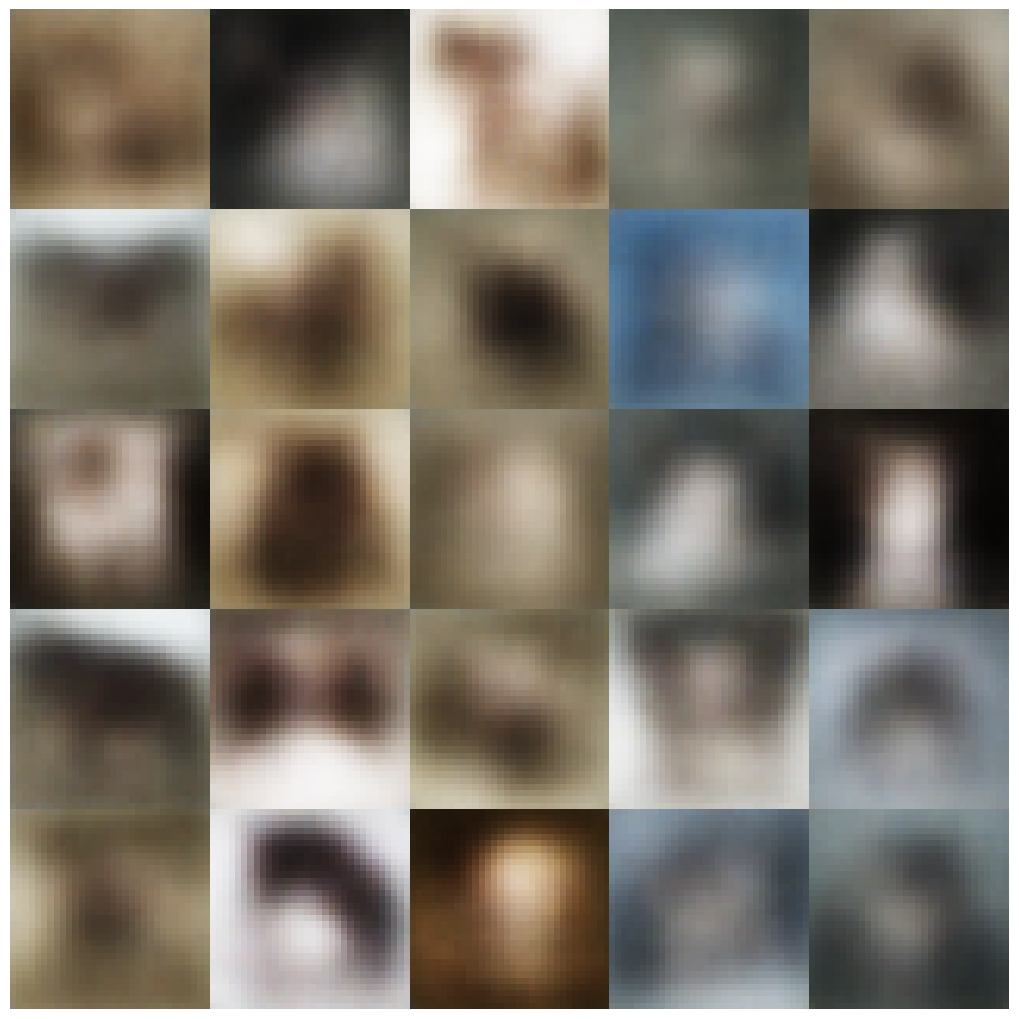

In [ ]:
# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(reconstructions[i*5 + j].cpu().squeeze(0).permute(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

**FID and IS score**

In [ ]:
# Install torchmetrics with image dependencies if not already installed
%pip install torchmetrics[image]

import torch
from torchmetrics.image.fid import FrechetInceptionDistance
from torchmetrics.image.inception import InceptionScore
import torchvision.transforms as T

# Define a function to calculate FID
def calculate_fid(real_images, generated_images, device, batch_size=64):
    fid = FrechetInceptionDistance(feature=2048).to(device)
    # Ensure images are in the correct format (uint8 and C, H, W)
    real_images = (real_images * 255).byte()
    generated_images = (generated_images * 255).byte()

    for i in range(0, real_images.size(0), batch_size):
        fid.update(real_images[i:i+batch_size].to(device), real=True)
    for i in range(0, generated_images.size(0), batch_size):
        fid.update(generated_images[i:i+batch_size].to(device), real=False)

    return fid.compute()

# Define a function to calculate Inception Score
def calculate_is(images, device, batch_size=64):
    is_score = InceptionScore().to(device)
    # Ensure images are in the correct format (uint8 and C, H, W)
    images = (images * 255).byte()

    for i in range(0, images.size(0), batch_size):
        is_score.update(images[i:i+batch_size].to(device))

    return is_score.compute()

# Generate a larger number of samples for evaluation (e.g., 1000)
num_eval_samples = 1000
gen_data_eval = normal_samper.sample(
    num_samples=num_eval_samples
).cpu()

# Use a subset of the real training data for evaluation
real_data_eval = torch.from_numpy(train_dataset[torch.randperm(len(train_dataset))[:num_eval_samples]]).cpu()


# Calculate FID score
fid_score = calculate_fid(real_data_eval, gen_data_eval, device)
print(f"FID score: {fid_score.item()}")

# Calculate Inception Score
# Note: Inception Score usually requires a larger number of samples (e.g., 10,000) for reliable results
# We will use 1000 samples here for demonstration purposes
is_mean, is_std = calculate_is(gen_data_eval, device)
print(f"Inception Score (mean): {is_mean.item()}, (std): {is_std.item()}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 33.1 MB/s eta 0:00:00


Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 296MB/s]


FID score: 297.5750732421875


/usr/local/lib/python3.12/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


Inception Score (mean): 1.7648133039474487, (std): 0.06836716085672379


### Report on Model Training and Evaluation

**Model Used:** VAE (Variational Autoencoder)

**Dataset:** CIFAR10

**Key Training Configuration:**
*   **Output Directory:** `my_model`
*   **Learning Rate:** 1e-4
*   **Per Device Train Batch Size:** 64
*   **Per Device Eval Batch Size:** 64
*   **Number of Epochs:** 50
*   **Optimizer:** AdamW
*   **Optimizer Parameters:** `weight_decay=0.05`, `betas=(0.91, 0.99)`

**Model Configuration:**
*   **Input Dimension:** (3, 32, 32) - corresponding to color CIFAR10 images
*   **Latent Dimension:** 16
*   **Encoder/Decoder Architectures:** ResNet-based architectures adapted for CIFAR.

**Training Process:**
The VAE model was trained for 10 epochs on the CIFAR10 training dataset. The training and evaluation losses were monitored during training.

**Evaluation Metrics and Results:**

*   **Sampler Used for Evaluation:** Normal Sampler (used to generate samples for FID and IS calculation)
*   **Number of Samples Used for Evaluation:** 1000 (for both FID and IS)
*   **Evaluation Device:** CUDA (GPU)

The following metrics were calculated using the `torchmetrics` library:

*   **Frechet Inception Distance (FID):** Measures the distance between the feature distributions of real and generated images. A *lower* FID score indicates better quality and diversity of generated images (closer to the real data distribution).
    *   **FID Score:** **297.5750**

*   **Inception Score (IS):** Measures the quality (cleanness) and diversity of generated images. A *higher* Inception Score indicates better quality and diversity.
    *   **Inception Score (mean):** **1.7648**
    *   **Inception Score (std):** **0.06836**